# Plot OOS data for events 

Plot the grace a and champ out of sample data for specefic events

In [73]:
#plot matplotlib figures in the notebook
%matplotlib inline

#auto reload modules before executing
%load_ext autoreload
%autoreload 2

#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import os, sys
import pickle

In [75]:
# queit day
sdate = '2008-05-10'
edate = '2008-05-18'

# small storm
sdate = '2008-09-01'
edate = '2008-09-12'

# moderate storm
sdate = '2006-04-12'
edate = '2006-04-20'

# large storm
sdate = '2005-08-21'
edate = '2005-08-30'



In [76]:
def oos_dat(ddir = 'D:/data/SatDensities/',
            dmod = ['SI','FI','FI_GEO']):
    """
    Function to return the out of sample datasets from rf_model( )

    ----------
    
    None
    
    ddir: str
        file directory for data

    Returns
    -------
    os_df : Pandas DataFrame
        DataFrame with the out of sample data for each model.

    """  
    # create empty data frames for returning 
    oos_a = pd.DataFrame( )
    oos_b = pd.DataFrame( )

    # read in the data
    for mod in dmod:
        
        with open(ddir+f'{mod}_RFdat.pkl','rb') as f:
            print(f)
            dat_a, dat_b = pickle.load(f)[4:]
            dat_a = dat_a[['400kmDensity', '400kmDensity_pred', 'DateTime', 
                           'storm','storm phase']]
            dat_a['Model'] = mod
            dat_b = dat_b[['400kmDensity', '400kmDensity_pred', 'DateTime', 
                           'storm','storm phase']]
            dat_b['Model'] = mod
    
        oos_a = pd.concat([oos_a,dat_a])
        oos_b = pd.concat([oos_b,dat_b])

    # calculate residuals
    oos_a['resid'] = oos_a['400kmDensity'] - oos_a['400kmDensity_pred']
    oos_b['resid'] = oos_b['400kmDensity'] - oos_b['400kmDensity_pred']
    
    return oos_a, oos_b

In [77]:
#read in data
oos_ga, oos_ch = oos_dat( ) # grace A and CHAMP out of sample data

oos_ga['DateTime'] = pd.to_datetime(oos_ga['DateTime'])
oos_ch['DateTime'] = pd.to_datetime(oos_ch['DateTime'])

sdate = pd.to_datetime(sdate)
edate = pd.to_datetime(edate)

<_io.BufferedReader name='D:/data/SatDensities/SI_RFdat.pkl'>
<_io.BufferedReader name='D:/data/SatDensities/FI_RFdat.pkl'>
<_io.BufferedReader name='D:/data/SatDensities/FI_GEO_RFdat.pkl'>


In [78]:
#define the data subsets
ga_si = oos_ga['Model'] == 'SI' # solar model
ga_fi = oos_ga['Model'] == 'FI' # FISM model
ga_fg = oos_ga['Model'] == 'FI_GEO' # FISM/GEO model

ch_si = oos_ch[(oos_ch['Model'] == 'SI') & (oos_ch['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ch['DateTime'] < edate)].sort_values(by='DateTime') # solar model
ch_fi = oos_ch[(oos_ch['Model'] == 'FI') & (oos_ch['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ch['DateTime'] < edate)].sort_values(by='DateTime') # FISM model
ch_fg = oos_ch[(oos_ch['Model'] == 'FI_GEO') & (oos_ch['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ch['DateTime'] < edate)].sort_values(by='DateTime') # FISM GEO model

ga_si = oos_ga[(oos_ga['Model'] == 'SI') & (oos_ga['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # solar model
ga_fi = oos_ga[(oos_ga['Model'] == 'FI') & (oos_ga['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # FISM model
ga_fg = oos_ga[(oos_ga['Model'] == 'FI_GEO') & (oos_ga['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # FISM GEO model


In [79]:
ch_si = oos_ch[(oos_ch['Model'] == 'SI') & (oos_ch['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ch['DateTime'] < edate)].sort_values(by='DateTime') # solar model
ch_fi = oos_ch[(oos_ch['Model'] == 'FI') & (oos_ch['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ch['DateTime'] < edate)].sort_values(by='DateTime') # FISM model
ch_fg = oos_ch[(oos_ch['Model'] == 'FI_GEO') & (oos_ch['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ch['DateTime'] < edate)].sort_values(by='DateTime') # FISM GEO model

ga_si = oos_ga[(oos_ga['Model'] == 'SI') & (oos_ga['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # solar model
ga_fi = oos_ga[(oos_ga['Model'] == 'FI') & (oos_ga['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # FISM model
ga_fg = oos_ga[(oos_ga['Model'] == 'FI_GEO') & (oos_ga['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # FISM GEO model

In [80]:
ga_si = pd.merge_asof(ga_fi['DateTime'], ga_si,on='DateTime',tolerance=pd.Timedelta('12h'),direction='nearest')

In [81]:
sat_df = pd.read_hdf("D:/data/SatDensities/satdrag_database_grace_CHAMP.hdf5")
sat_df.columns
sat_df['SatDensity'] = sat_df['SatDensity']*(10**12)

Index(['DateTime', 'DateTime_omni', 'B', 'Bx_GSEGSM', 'By_GSE', 'Bz_GSE',
       'By_GSM', 'Bz_GSM', 'Vsw', 'Vx_GSE', 'Vy_GSE', 'Vz_GSE', 'Prho', 'Tp',
       'dynP', 'Esw', 'AE', 'AL', 'AU', 'SYM_D index', 'SYM_H index',
       'ASY_D index', 'ASY_H index', 'PC index', 'Goes Proton flux (>10 MeV)',
       'Goes Proton flux (>30 MeV)', 'Goes Proton flux (>60 MeV)',
       'DateTime_fism2', '225_00', '600_01', '1300_02', '2500_03', '5100_04',
       '11250_05', '18950_06', '25700_07', '30500_08', '43000_09', '59500_10',
       '72400_11', '72400_12', '85550_13', '85550_14', '85550_15', '94400_16',
       '94400_17', '94400_18', '98100_19', '100700_20', '103850_21',
       '113000_22', 'DateTime_si', 'F10', 'F81', 'S10', 'S81c', 'M10', 'M81c',
       'Y10', 'Y81c', 'DateTime_gr', 'CenterLat', 'SatLat', 'SatLon',
       'SatHeight', 'SatLT', 'SatDipoleLat', 'SatMagLon', 'SatMagLT',
       'SatDensity', '400kmDensity', '410kmDensity', 'NRLMSISe00atSat',
       'DenUncertainty', 'NumPts', '

In [82]:
#add read_io module to current path ()
file_path = 'D:\\GitHub\\DataIO\\'
sys.path.append(os.path.dirname(file_path))

# import data input/output module
import data_io as dio

# read omni data and truncate data to similar range as grace data
om_d, om_m = dio.load_omni(res='5m',sdate=sdate, nd=2)


In [83]:
om_d.columns
om_m

Index(['DateTime', 'IMF_id', 'SW_id', 'IMF_pt', 'SW_pt', 'Per_int',
       'Timeshift', 'RMS_Timeshift', 'RMS_PhaseFrontNormal',
       'Time_btwn_observations', 'B', 'Bx_GSEGSM', 'By_GSE', 'Bz_GSE',
       'By_GSM', 'Bz_GSM', 'RMS_SD_B', 'RMS_SD_field_vector', 'Vsw', 'Vx_GSE',
       'Vy_GSE', 'Vz_GSE', 'Prho', 'Tp', 'dynP', 'Esw', 'Beta', 'AlfvenMach',
       'X(s/c), GSE', 'Y(s/c), GSE', 'Z(s/c), GSE', 'BSN location, Xgse',
       'BSN location, Ygse', 'BSN location, Zgse', 'AE', 'AL', 'AU',
       'SYM_D index', 'SYM_H index', 'ASY_D index', 'ASY_H index', 'PC index',
       'Na_Np Ratio', 'MagnetosonicMach', 'Goes Proton flux (>10 MeV)',
       'Goes Proton flux (>30 MeV)', 'Goes Proton flux (>60 MeV)'],
      dtype='object')

{'description': 'Omni2 data from https://spdf.gsfc.nasa.gov/pub/data/omni/high_res_omni/\n    Description and units at https://omniweb.gsfc.nasa.gov/html/omni_min_data.html#4b\n            ',
 'res': '5m',
 'files':                                         fname  fexists
 0  D:\data\OMNI\YEARLY_5MIN\omni_5min2005.asc     True
 1  D:\data\OMNI\YEARLY_5MIN\omni_5min2006.asc     True}

<Axes: xlabel='DateTime', ylabel='Sym-H - nT'>

<Axes: xlabel='DateTime', ylabel='AE - nT'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<bound method Figure.draw of <Figure size 500x800 with 7 Axes>>

<Figure size 640x480 with 0 Axes>

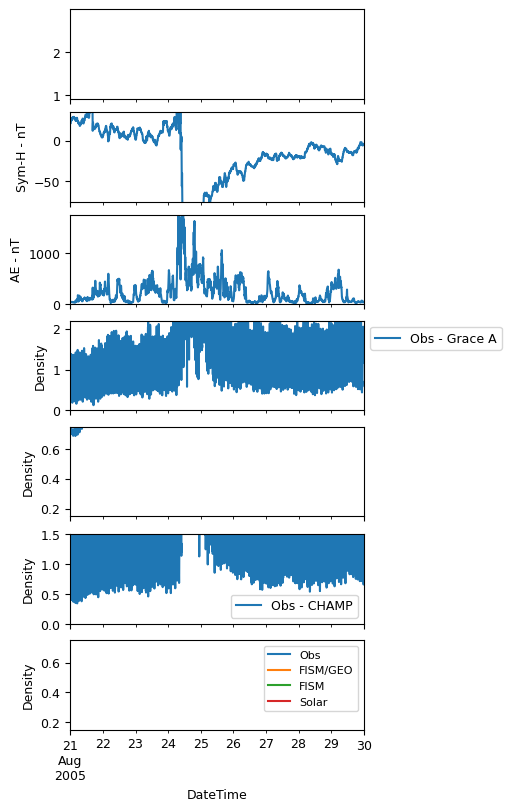

In [84]:
sfig = False
plt.rcParams.update({'font.size': 9})
plt.subplots_adjust(hspace=0)
#fig, ax = plt.subplots(8,1,figsize=(5,8),sharex=True, layout='constrained')
fig, ax = plt.subplots(7,1,figsize=(5,8),sharex=True, layout='constrained')

#define good times for plotting
om_gd = (om_d['DateTime'] > sdate) & (om_d['DateTime'] <= edate)
ga_gd = (oos_ga['DateTime'] > sdate) & (oos_ga['DateTime'] <= edate)
ch_gd = (oos_ch['DateTime'] > sdate) & (oos_ch['DateTime'] <= edate)
sat_gd = (sat_df['DateTime'] > sdate) & (sat_df['DateTime'] <= edate)

ax[0].plot(pd.to_datetime(ga_si['DateTime']), ga_si['400kmDensity_pred'])

#om_d[om_gd].plot(x='DateTime', y='Vsw', xlim=[sdate,edate], ax=ax[0], label='Vsw', ylabel='Vsw - km/s', legend=False)
#om_d[om_gd].plot(x='DateTime', y='dynP', xlim=[sdate,edate], ax=ax[0], label='$\mathregular{P_{dyn}}$', ylabel='$\mathregular{P_{dyn}}$ - nPa', legend=True, secondary_y=True)
#ax[0].legend(loc='upper right')
#om_d[om_gd].plot(x='DateTime', y='Bz_GSM', xlim=[sdate,edate], ax=ax[1], label='SW Bz', ylabel='$\mathregular{B_{z}}$ - nT', legend=False)


om_d[om_gd].plot(x='DateTime', y='SYM_H index', xlim=[sdate,edate], ax=ax[1], label='Sym-H', ylabel='Sym-H - nT', legend=False, ylim=(-75,35))
om_d[om_gd].plot(x='DateTime', y='AE', xlim=[sdate,edate], ax=ax[2], label='AE', ylabel='AE - nT', legend=False, ylim=(0,1750))


ga_fg.plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax[3], label='Obs - Grace A', ylabel='Density', legend=True,ylim=(0,2.2))
ax[3].legend(bbox_to_anchor=(1.,1))


ga_fg[['DateTime','400kmDensity']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax[4], label='Obs', ylabel='Density', legend=False, ylim=(0.15,0.75))
ga_fg[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM/GEO', ylabel='Density', legend=False)
ga_fi[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM', ylabel='Density', legend=False)
ga_si.plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM', ylabel='Density', legend=False)


ch_fg.plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax[5], label='Obs - CHAMP', ylabel='Density', legend=True, ylim=(0,1.5))


ch_fg[['DateTime','400kmDensity']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax[6], label='Obs', ylabel='Density', legend=True, ylim=(0.15,0.75))
ch_fg[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[6], label='FISM/GEO', ylabel='Density', legend=True)
ch_fi[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[6], label='FISM', ylabel='Density', legend=True)
ch_si[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[6], label='Solar', ylabel='Density', legend=True)
ax[6].legend(bbox_to_anchor=(1.,1),fontsize=8)


fig.draw

if sfig:
    fig.savefig(f'C:/Users/krmurph1/OneDrive/SatDrag_RF/{pd.to_datetime(sdate).strftime("%Y%m%d")}.pdf', dpi=300, format='pdf')

In [85]:
f'C:/Users/krmurph1/OneDrive/SatDrag_RF/{pd.to_datetime(sdate).strftime("%Y%m%d")}.pdf'

'C:/Users/krmurph1/OneDrive/SatDrag_RF/20050821.pdf'

<Axes: xlabel='DateTime', ylabel='Sym-H - nT'>

<Axes: xlabel='DateTime', ylabel='AE - nT'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<bound method Figure.draw of <Figure size 500x800 with 7 Axes>>

<Figure size 640x480 with 0 Axes>

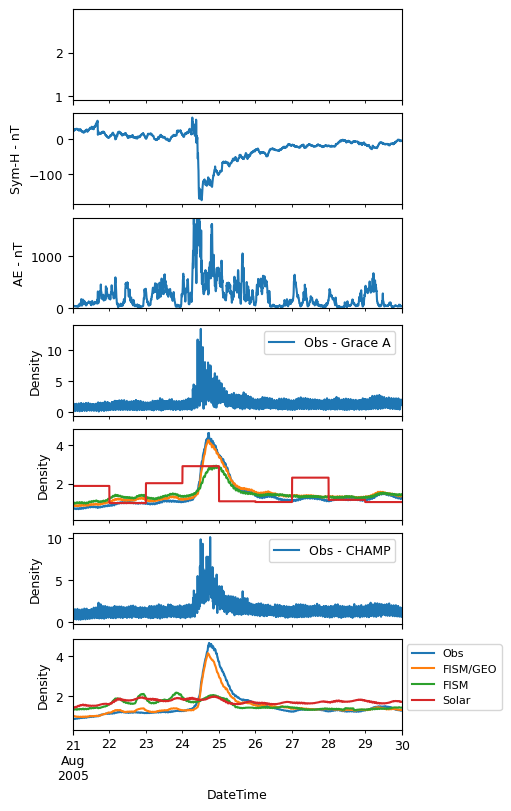

In [86]:
sfig = True
plt.rcParams.update({'font.size': 9})
plt.subplots_adjust(hspace=0)
#fig, ax = plt.subplots(8,1,figsize=(5,8),sharex=True, layout='constrained')
fig1, ax1 = plt.subplots(7,1,figsize=(5,8),sharex=True, layout='constrained')

#define good times for plotting
om_gd = (om_d['DateTime'] > sdate) & (om_d['DateTime'] <= edate)
ga_gd = (oos_ga['DateTime'] > sdate) & (oos_ga['DateTime'] <= edate)
ch_gd = (oos_ch['DateTime'] > sdate) & (oos_ch['DateTime'] <= edate)
sat_gd = (sat_df['DateTime'] > sdate) & (sat_df['DateTime'] <= edate)

ax1[0].plot(pd.to_datetime(ga_si['DateTime']), ga_si['400kmDensity_pred'])

#om_d[om_gd].plot(x='DateTime', y='Vsw', xlim=[sdate,edate], ax=ax[0], label='Vsw', ylabel='Vsw - km/s', legend=False)
#om_d[om_gd].plot(x='DateTime', y='dynP', xlim=[sdate,edate], ax=ax[0], label='$\mathregular{P_{dyn}}$', ylabel='$\mathregular{P_{dyn}}$ - nPa', legend=True, secondary_y=True)
#ax[0].legend(loc='upper right')
#om_d[om_gd].plot(x='DateTime', y='Bz_GSM', xlim=[sdate,edate], ax=ax[1], label='SW Bz', ylabel='$\mathregular{B_{z}}$ - nT', legend=False)


om_d[om_gd].plot(x='DateTime', y='SYM_H index', xlim=[sdate,edate], ax=ax1[1], label='Sym-H', ylabel='Sym-H - nT', legend=False)
om_d[om_gd].plot(x='DateTime', y='AE', xlim=[sdate,edate], ax=ax1[2], label='AE', ylabel='AE - nT', legend=False, ylim=(0,1750))


ga_fg.plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax1[3], label='Obs - Grace A', ylabel='Density', legend=True)
ax1[3].legend(bbox_to_anchor=(1.,1))


ga_fg[['DateTime','400kmDensity']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax1[4], label='Obs', ylabel='Density', legend=False)
ga_fg[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax1[4], label='FISM/GEO', ylabel='Density', legend=False)
ga_fi[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax1[4], label='FISM', ylabel='Density', legend=False)
ga_si.plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax1[4], label='FISM', ylabel='Density', legend=False)


ch_fg.plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax1[5], label='Obs - CHAMP', ylabel='Density', legend=True)


ch_fg[['DateTime','400kmDensity']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax1[6], label='Obs', ylabel='Density', legend=True)
ch_fg[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax1[6], label='FISM/GEO', ylabel='Density', legend=True)
ch_fi[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax1[6], label='FISM', ylabel='Density', legend=True)
ch_si[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax1[6], label='Solar', ylabel='Density', legend=True)
ax1[6].legend(bbox_to_anchor=(1.,1),fontsize=8)


fig1.draw

if sfig:
    fig1.savefig(f'C:/Users/krmurph1/OneDrive/SatDrag_RF/{pd.to_datetime(sdate).strftime("%Y%m%d")}.pdf', dpi=300, format='pdf')